In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

file = "Net_generation_for_electric_power_by_year.csv"

# Read our Kickstarter data into pandas
df = pd.read_csv(file)
df

,Net generation for electric power,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,https://www.eia.gov/electricity/data/browser/#...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Feb 04 2021 20:30:08 GMT-0700 (Mountain St...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Source: U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,Net generation for electric power,thousand megawatthours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii : all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1551,Hawaii : small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1552,Hawaii : all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268
1553,Hawaii : utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268


In [2]:
energy_df=df.drop([0, 1, 2, 4])

In [3]:
energy_df[['Net generation for electric power', 'Energy Source']] = energy_df['Net generation for electric power'].str.split(':', expand=True)
energy_df

,Net generation for electric power,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Energy Source
3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,None
5,United States,NaN,ELEC.GEN..A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [4]:
# set row 3 as header, can make row 3 a list and make that a column header somehow
# energy_date_df[['']]
header_row= 0
energy_df.columns= energy_df.iloc[header_row]
energy_df

3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,NaN
3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,None
5,United States,NaN,ELEC.GEN..A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [5]:
# Drop extra and empty rows
energy_df= energy_df.drop([3, 5])
energy_df


3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,NaN
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
9,United States,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,14336,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,petroleum coke
10,United States,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,814752,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,natural gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [6]:
# Rename empty column heading as "Energy_Source"
energy_df.rename(columns = {None: "Energy_Source"}, inplace= True)
energy_df

3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Energy_Source
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
9,United States,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,14336,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,petroleum coke
10,United States,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,814752,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,natural gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [7]:
# Move the Energy_Source column from the end of the dataframe to the far left side
mid = energy_df['Energy_Source']
energy_df.drop(labels=['Energy_Source'], axis = 1, inplace = True)
energy_df.insert(1, 'Energy_Source', mid)
energy_df

3,description,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,...,3972386,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1827738,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,22375,15343,12649,13207,17485,16626,12429,11848,15595,11080
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12304,12859,7423,11303,10558,9879,10282,8192,8333,6238
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,901389,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1552,Hawaii,all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268


In [9]:
# Rename description column to location 
energy_df.rename(columns = {"description": "Location"}, inplace= True)
energy_df

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,...,3972386,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1827738,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,22375,15343,12649,13207,17485,16626,12429,11848,15595,11080
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12304,12859,7423,11303,10558,9879,10282,8192,8333,6238
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,901389,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1552,Hawaii,all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268


In [10]:
energy_df.Energy_Source.unique()

array([' all fuels (utility-scale)', ' coal', ' petroleum liquids',
       ' petroleum coke', ' natural gas', ' other gases', ' nuclear',
       ' conventional hydroelectric', ' other renewables', ' wind',
       ' all utility-scale solar', ' utility-scale photovoltaic',
       ' utility-scale thermal', ' geothermal', ' biomass',
       ' wood and wood-derived fuels', ' other biomass',
       ' hydro-electric pumped storage', ' other', ' all solar',
       ' small-scale solar photovoltaic', None], dtype=object)

In [15]:
mapper={' all fuels (utility-scale)': 'all',
        ' coal': 'non-renewable', 
        ' petroleum liquids': 'non-renewable',
        ' petroleum coke':'non-renewable', 
        ' natural gas':'non-renewable', 
        ' other gases':'non-renewable',
        ' nuclear':'non-renewable',
        ' conventional hydroelectric':'renewable', 
        ' other renewables':'renewable',
        ' wind':'renewable',
        ' all utility-scale solar':'all', 
        ' utility-scale photovoltaic':'renewable',
        ' utility-scale thermal':'renewable', 
        ' geothermal':'renewable', 
        ' biomass':'renewable',
        ' wood and wood-derived fuels':'non-renewable',
        ' other biomass': 'renewable',
        ' hydro-electric pumped storage':'renewable', 
        ' other':'non-renewable', 
        ' all solar':'all',
        ' small-scale solar photovoltaic':'renewable'}

energy_df['Renewable']=energy_df['Energy_Source'].map(mapper)

energy_df

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,renewable
1552,Hawaii,all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,renewable


In [16]:
#Removing extra spaces from the Location column strings
energy_df['Location']=energy_df['Location'].str.strip()

In [17]:
#Removing total rows (labeled as all) to avoid counting duplicates
filtered_df=energy_df[energy_df['Renewable']!='all']
filtered_df


3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
11,United States,other gases,thousand megawatthours,ELEC.GEN.OOG-US-98.A,586,1970,2647,3568,3777,4254,...,2939,2984,4322,3358,3715,3912,4126,4086,4037,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,Hawaii,hydro-electric pumped storage,thousand megawatthours,ELEC.GEN.HPS-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,renewable
1549,Hawaii,other,thousand megawatthours,ELEC.GEN.OTH-HI-98.A,118,143,172,25,21,27,...,211,216,219,218,187,125,182,189,171,non-renewable
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,renewable
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,renewable


In [18]:
#Removing rows where all of the data is blank.
filtered_df2=filtered_df[((filtered_df['2001']!="--")&(filtered_df['2002']!="--")&
                         (filtered_df['2003']!="--")&(filtered_df['2004']!="--")&
                         (filtered_df['2005']!="--")&(filtered_df['2006']!="--")&
                         (filtered_df['2007']!="--")&(filtered_df['2008']!="--")&
                         (filtered_df['2009']!="--")&(filtered_df['2010']!="--")&
                         (filtered_df['2011']!="--")&(filtered_df['2012']!="--")&
                         (filtered_df['2013']!="--")&(filtered_df['2014']!="--")&
                         (filtered_df['2015']!="--")&(filtered_df['2016']!="--")&
                         (filtered_df['2017']!="--")&(filtered_df['2018']!="--")&
                         (filtered_df['2019']!="--"))]

filtered_df2

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
11,United States,other gases,thousand megawatthours,ELEC.GEN.OOG-US-98.A,586,1970,2647,3568,3777,4254,...,2939,2984,4322,3358,3715,3912,4126,4086,4037,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,Hawaii,wind,thousand megawatthours,ELEC.GEN.WND-HI-98.A,2,2,2,7,7,80,...,341,378,503,579,613,639,532,602,529,renewable
1544,Hawaii,geothermal,thousand megawatthours,ELEC.GEN.GEO-HI-98.A,207,73,178,213,222,212,...,224,261,275,254,230,260,323,110,0,renewable
1545,Hawaii,biomass,thousand megawatthours,ELEC.GEN.BIO-HI-98.A,164,169,339,141,134,129,...,39,22,29,37,52,89,104,104,108,renewable
1547,Hawaii,other biomass,thousand megawatthours,ELEC.GEN.WAS-HI-98.A,164,169,339,141,134,129,...,39,22,29,37,52,89,104,104,108,renewable


In [19]:
#create a dataframe for the Mountain region
MNT_df=filtered_df2.loc[filtered_df2["Location"]=="Mountain"]
MNT_df=MNT_df.drop(columns=["source key", "units", "Location"])

MNT_df=MNT_df.set_index(["Renewable", "Energy_Source"]).sort_index()
MNT_df

3                                               2001    2002    2003    2004  \
Renewable     Energy_Source                                                    
non-renewable  coal                           215010  208157  214881  219311   
               natural gas                     40705   43443   47444   60637   
               nuclear                         28724   30862   28581   28113   
               other                               4      93    1343    1371   
               petroleum coke                    497     456     388     417   
               petroleum liquids                1514     237     236     275   
               wood and wood-derived fuels        38      73      87      84   
renewable      biomass                           128     178     164     167   
               conventional hydroelectric      27093   30546   28335   28283   
               geothermal                       1353    1345    1264    1492   
               hydro-electric pumped storage      26     -96      80    -245   
               other biomass                      90     105      78      83   
               other renewables                 1895    2110    2125    3013   
               wind                              414     586     696    1350   
NaN           NaN                                NaN     NaN     NaN     NaN   

3                                               2005    2006    2007    2008  \
Renewable     Energy_Source                                                    
non-renewable  coal                           219829  209239  209121  212268   
               natural gas                     66096   76016   91031   92520   
               nuclear                         25807   24012   26782   29250   
               other                               3       5       5     110   
               petroleum coke                    398     397     463     404   
               petroleum liquids                 211     277     232     237   
               wood and wood-derived fuels       100      84      75     145   
renewable      biomass                           187     171     157     252   
               conventional hydroelectric      29415   33803   30253   32254   
               geothermal                       1448    1534    1417    1723   
               hydro-electric pumped storage     -15     -52     -43    -155   
               other biomass                      87      87      82     107   
               other renewables                 3937    5204    5736    8815   
               wind                             2288    3486    4108    6651   
NaN           NaN                                NaN     NaN     NaN     NaN   

3                                               2009    2010    2011    2012  \
Renewable     Energy_Source                                                    
non-renewable  coal                           199822  205106  198153  190890   
               natural gas                     90788   80578   70026   83143   
               nuclear                         30662   31200   31278   31934   
               other                             134     322     405     393   
               petroleum coke                    478     395     443     454   
               petroleum liquids                 234     261     253     217   
               wood and wood-derived fuels       214     211     213     228   
renewable      biomass                           370     387     417     511   
               conventional hydroelectric      32787   30863   42097   34743   
               geothermal                       1988    2419    2540    2757   
               hydro-electric pumped storage      61      88    -122    -165   
               other biomass                     156     176     204     282   
               other renewables                10832   13573   18821   22210   
               wind                             8260   10484   15305   17068  

In [20]:
#refine the MNT dataframe so the annual data are the data rows
MNT_df=MNT_df.dropna()
MNT_df=MNT_df.astype(int)
MNT_df=MNT_df.T
MNT_df

Renewable     non-renewable                                               \
Energy_Source          coal  natural gas  nuclear  other  petroleum coke   
3                                                                          
2001                 215010        40705    28724      4             497   
2002                 208157        43443    30862     93             456   
2003                 214881        47444    28581   1343             388   
2004                 219311        60637    28113   1371             417   
2005                 219829        66096    25807      3             398   
2006                 209239        76016    24012      5             397   
2007                 209121        91031    26782      5             463   
2008                 212268        92520    29250    110             404   
2009                 199822        90788    30662    134             478   
2010                 205106        80578    31200    322             395   
2011                 198153        70026    31278    405             443   
2012                 190890        83143    31934    393             454   
2013                 201230        83702    31431    374             448   
2014                 193551        81482    32321    289             403   
2015                 180708        95196    32526    320             483   
2016                 160272        97127    32377    400             443   
2017                 160614        86037    32340    430             445   
2018                 151543       103301    31097    401             429   
2019                 140309       114054    31920    369             449   

Renewable                                                     renewable  \
Energy_Source  petroleum liquids  wood and wood-derived fuels   biomass   
3                                                                         
2001                        1514                           38       128   
2002                         237                           73       178   
2003                         236                           87       164   
2004                         275                           84       167   
2005                         211                          100       187   
2006                         277                           84       171   
2007                         232                           75       157   
2008                         237                          145       252   
2009                         234                          214       370   
2010                         261                          211       387   
2011                         253                          213       417   
2012                         217                          228       511   
2013                         209                          173       624   
2014                         233                          275       684   
2015                         212                          237       638   
2016                         215                          321       674   
2017                         209                          277       628   
2018                         186                          330       658   
2019                         366                          348       668   

Renewable                                              \
Energy_Source  conventional hydroelectric  geothermal   
3                                                       
2001                                27093        1353   
2002                                30546        1345   
2003                                28335        1264   
2004                                28283        1492   
2005                                29415        1448   
2006                                33803        1534   
2007                                30253        1417   
2008                                32254        1723   
2009                                32787        

In [21]:
#create a summary table for MNT energy production by source
MNT_sum=MNT_df.agg(["mean", "std", "min", "max"])

MNT_quant=MNT_df.quantile([.25, .5, .75])
MNT_sum=MNT_sum.append(MNT_quant)
MNT_sum

non-renewable                                                            \
               coal    natural gas       nuclear        other  petroleum coke   
mean  194211.263158   79122.421053  30064.052632   356.368421      436.315789   
std    24187.023555   20129.592606   2464.254620   387.220610       32.583317   
min   140309.000000   40705.000000  24012.000000     3.000000      388.000000   
max   219829.000000  114054.000000  32526.000000  1371.000000      497.000000   
0.25  185799.000000   68061.000000  28652.500000   101.500000      403.500000   
0.5   201230.000000   83143.000000  31097.000000   322.000000      443.000000   
0.75  210753.500000   91775.500000  31927.000000   400.500000      455.000000   

                                                       renewable  \
      petroleum liquids  wood and wood-derived fuels     biomass   
mean          306.00000                   184.894737  403.315789   
std           295.06986                    98.526869  220.908491   
min           186.00000                    38.000000  128.000000   
max          1514.00000                   348.000000  684.000000   
0.25          213.50000                    85.500000  174.500000   
0.5           234.00000                   211.000000  387.000000   
0.75          257.00000                   256.000000  633.000000   

                                                                              \
      conventional hydroelectric   geothermal  hydro-electric pumped storage   
mean                31958.368421  2472.052632                    -124.947368   
std                  3375.500970  1046.109803                     132.338150   
min                 27093.000000  1264.000000                    -372.000000   
max                 42097.000000  3971.000000                      88.000000   
0.25                29834.000000  1470.000000                    -223.500000   
0.5                 31845.000000  2419.000000                    -155.000000   
0.75                33295.000000  3481.500000                     -29.000000   

                                                     
      other biomass  other renewables          wind  
mean     218.368421      18847.684211  12240.105263  
std      134.251510      16174.502036   9900.979317  
min       78.000000       1895.000000    414.000000  
max      451.000000      48652.000000  28527.000000  
0.25      88.500000       4570.500000   2887.000000  
0.5      176.000000      13573.000000  10484.000000  
0.75     339.500000      29128.500000  19762.000000

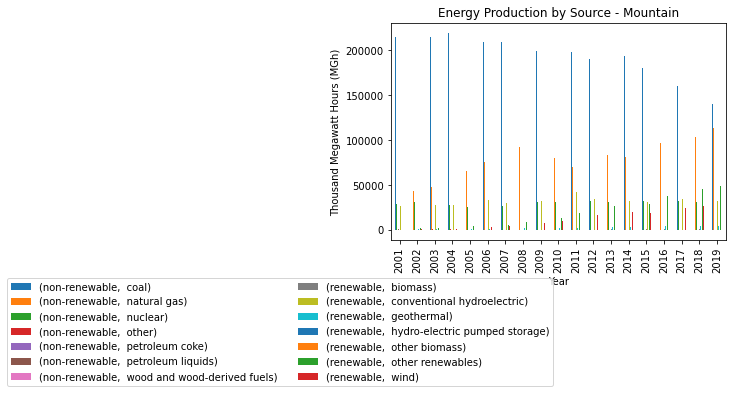

In [25]:
#create a plot showing energy production in the region over time
MNT_df.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Energy Production by Source - Mountain")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

In [26]:
#create a dataframe for change in energy production for MNT
MNT_delta=MNT_df.diff(axis=0)
MNT_delta=MNT_delta.drop("2001")
MNT_delta

Renewable     non-renewable                                                \
Energy_Source          coal  natural gas  nuclear   other  petroleum coke   
3                                                                           
2002                -6853.0       2738.0   2138.0    89.0           -41.0   
2003                 6724.0       4001.0  -2281.0  1250.0           -68.0   
2004                 4430.0      13193.0   -468.0    28.0            29.0   
2005                  518.0       5459.0  -2306.0 -1368.0           -19.0   
2006               -10590.0       9920.0  -1795.0     2.0            -1.0   
2007                 -118.0      15015.0   2770.0     0.0            66.0   
2008                 3147.0       1489.0   2468.0   105.0           -59.0   
2009               -12446.0      -1732.0   1412.0    24.0            74.0   
2010                 5284.0     -10210.0    538.0   188.0           -83.0   
2011                -6953.0     -10552.0     78.0    83.0            48.0   
2012                -7263.0      13117.0    656.0   -12.0            11.0   
2013                10340.0        559.0   -503.0   -19.0            -6.0   
2014                -7679.0      -2220.0    890.0   -85.0           -45.0   
2015               -12843.0      13714.0    205.0    31.0            80.0   
2016               -20436.0       1931.0   -149.0    80.0           -40.0   
2017                  342.0     -11090.0    -37.0    30.0             2.0   
2018                -9071.0      17264.0  -1243.0   -29.0           -16.0   
2019               -11234.0      10753.0    823.0   -32.0            20.0   

Renewable                                                     renewable  \
Energy_Source  petroleum liquids  wood and wood-derived fuels   biomass   
3                                                                         
2002                     -1277.0                         35.0      50.0   
2003                        -1.0                         14.0     -14.0   
2004                        39.0                         -3.0       3.0   
2005                       -64.0                         16.0      20.0   
2006                        66.0                        -16.0     -16.0   
2007                       -45.0                         -9.0     -14.0   
2008                         5.0                         70.0      95.0   
2009                        -3.0                         69.0     118.0   
2010                        27.0                         -3.0      17.0   
2011                        -8.0                          2.0      30.0   
2012                       -36.0                         15.0      94.0   
2013                        -8.0                        -55.0     113.0   
2014                        24.0                        102.0      60.0   
2015                       -21.0                        -38.0     -46.0   
2016                         3.0                         84.0      36.0   
2017                        -6.0                        -44.0     -46.0   
2018                       -23.0                         53.0      30.0   
2019                       180.0                         18.0      10.0   

Renewable                                              \
Energy_Source  conventional hydroelectric  geothermal   
3                                                       
2002                               3453.0        -8.0   
2003                              -2211.0       -81.0   
2004                                -52.0       228.0   
2005                               1132.0       -44.0   
2006                               4388.0        86.0   
2007                              -3550.0      -117.0   
2008                               2001.0       306.0   
2009                                533.0       265.0   
2010                              -1924.0       431.0   
2011                              11234.0       121.0   
2012                              -7354.0       217.0   
2013    

In [27]:
#create a summary table for changes in MNT energy production by source
MNT_delta_sum=MNT_delta.agg(["mean", "std", "min", "max"])

MNT_delta_quant=MNT_delta.quantile([.25, .5, .75])
MNT_delta_sum=MNT_delta_sum.append(MNT_delta_quant)
MNT_delta_sum

non-renewable                                                          \
              coal   natural gas      nuclear        other  petroleum coke   
mean  -4150.055556   4074.944444   177.555556    20.277778       -2.666667   
std    8278.599054   9006.173637  1490.792060   454.191046       48.946549   
min  -20436.000000 -11090.000000 -2306.000000 -1368.000000      -83.000000   
max   10340.000000  17264.000000  2770.000000  1250.000000       80.000000   
0.25 -10210.250000  -1159.250000  -494.250000   -17.250000      -40.750000   
0.5   -6903.000000   3369.500000   141.500000    26.000000       -3.500000   
0.75   2489.750000  12526.000000   873.250000    82.250000       26.750000   

                                                       renewable  \
      petroleum liquids  wood and wood-derived fuels     biomass   
mean         -63.777778                    17.222222   30.000000   
std          307.330930                    44.445016   50.426417   
min        -1277.000000                   -55.000000  -46.000000   
max          180.000000                   102.000000  118.000000   
0.25         -22.500000                    -7.500000   -9.750000   
0.5           -4.500000                    14.500000   25.000000   
0.75          19.250000                    48.500000   57.500000   

                                                                             \
      conventional hydroelectric  geothermal  hydro-electric pumped storage   
mean                  306.388889  143.222222                     -11.944444   
std                  4169.299929  168.106253                     144.721425   
min                 -7354.000000 -117.000000                    -325.000000   
max                 11234.000000  431.000000                     230.000000   
0.25                -2139.250000  -32.000000                    -106.750000   
0.5                   467.500000  169.000000                     -12.500000   
0.75                 2682.750000  283.250000                      69.750000   

                                                    
      other biomass  other renewables         wind  
mean      12.777778       2597.611111  1561.833333  
std       49.562267       2223.961202  1522.078117  
min      -49.000000          1.000000 -1315.000000  
max      169.000000       8465.000000  4900.000000  
0.25      -8.000000        897.000000   709.750000  
0.5        2.000000       2719.500000  1403.500000  
0.75      23.750000       3311.500000  2203.000000

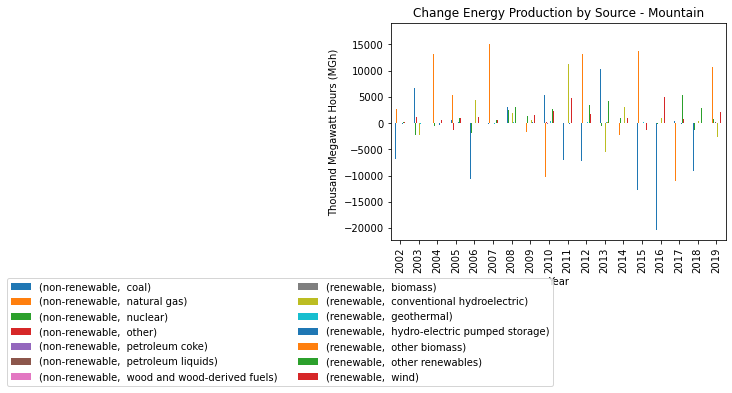

In [28]:
#create a plot showing the change in energy production by source over time for the MNT region
MNT_delta.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Change Energy Production by Source - Mountain")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

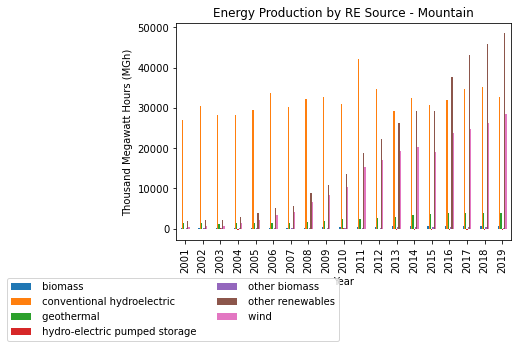

In [29]:
#breakout out MNT dataframe to include renewable energy sources only and plot energy production over time
RE_MNT=MNT_df.loc[:, ("renewable")]
RE_MNT.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Energy Production by RE Source - Mountain")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

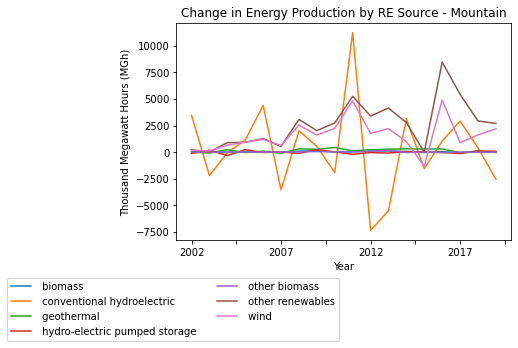

In [30]:
#create a dataframe for change in renewable energy production for MNT & plot change in energy production over time
RE_MNT_delta=RE_MNT.diff(axis=0)
RE_MNT_delta=RE_MNT_delta.drop("2001")
RE_MNT_delta.plot(kind="line")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Change in Energy Production by RE Source - Mountain")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

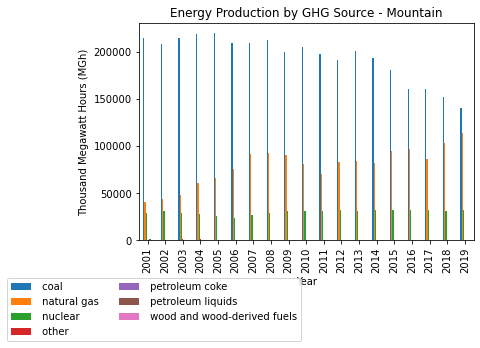

In [33]:
#breakout out MNT dataframe to include non-renewable energy sources only and plot energy production over time
GHG_MNT=MNT_df.loc[:, ("non-renewable")]
GHG_MNT.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Energy Production by GHG Source - Mountain")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

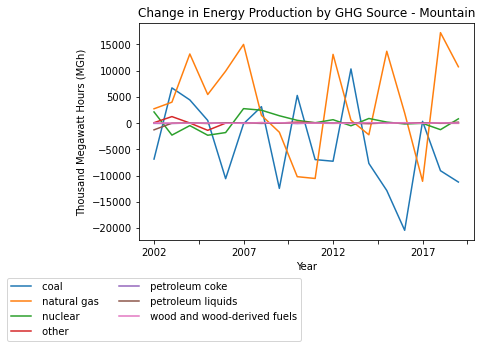

In [34]:
#create a dataframe for change in non-renewable energy production for MNT & plot change in energy production over time
GHG_MNT_delta=GHG_MNT.diff(axis=0)
GHG_MNT_delta=GHG_MNT_delta.drop("2001")
GHG_MNT_delta.plot(kind="line")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Change in Energy Production by GHG Source - Mountain")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

In [35]:
#create a dataframe for the state of Idaho
ID_df=filtered_df2.loc[filtered_df2["Location"]=="Idaho"]
ID_df=ID_df.drop(columns=["source key", "units", "Location"])

ID_df=ID_df.set_index(["Renewable", "Energy_Source"]).sort_index()
ID_df

3                                           2001  2002  2003  2004  2005  \
Renewable     Energy_Source                                                
non-renewable  natural gas                  1299   247  1324  1642  1537   
               petroleum liquids               4     0     0     0     0   
               wood and wood-derived fuels    38    73    87    84    88   
renewable      biomass                        38    73    87    84    88   
               conventional hydroelectric   7223  8769  8354  8462  8542   
               other renewables               38    73    87    84    88   
NaN           NaN                            NaN   NaN   NaN   NaN   NaN   

3                                            2006  2007  2008   2009  2010  \
Renewable     Energy_Source                                                  
non-renewable  natural gas                   1263  1618  1664   1594  1659   
               petroleum liquids                0     0     0      0     0   
               wood and wood-derived fuels     76    75    69     76    69   
renewable      biomass                         76    75    69     76    93   
               conventional hydroelectric   11242  9022  9363  10434  9154   
               other renewables               246   248   362    465   606   
NaN           NaN                             NaN   NaN   NaN    NaN   NaN   

3                                            2011   2012  2013  2014  2015  \
Renewable     Energy_Source                                                  
non-renewable  natural gas                   1069   1849  3349  2522  3734   
               petroleum liquids                0      0     0     0     0   
               wood and wood-derived fuels     69     71    68    59    59   
renewable      biomass                        102    153   254   216   215   
               conventional hydroelectric   13405  10940  8473  9002  8757   
               other renewables              1472   2118  2754  3101  2561   
NaN           NaN                             NaN    NaN   NaN   NaN   NaN   

3                                           2016   2017   2018   2019  
Renewable     Energy_Source                                            
non-renewable  natural gas                  3142   2908   3147   4092  
               petroleum liquids               0      0      0      0  
               wood and wood-derived fuels    60     54     59     59  
renewable      biomass                       156    148    134    136  
               conventional hydroelectric   9033  10670  11024  10333  
               other renewables             2836   3236   3428   3338  
NaN           NaN                            NaN    NaN    NaN    NaN

In [36]:
#refine the Idaho dataframe so the annual data are the data rows
ID_df=ID_df.dropna()
ID_df=ID_df.astype(int)
ID_df=ID_df.T
ID_df

Renewable     non-renewable                                                  \
Energy_Source   natural gas  petroleum liquids  wood and wood-derived fuels   
3                                                                             
2001                   1299                  4                           38   
2002                    247                  0                           73   
2003                   1324                  0                           87   
2004                   1642                  0                           84   
2005                   1537                  0                           88   
2006                   1263                  0                           76   
2007                   1618                  0                           75   
2008                   1664                  0                           69   
2009                   1594                  0                           76   
2010                   1659                  0                           69   
2011                   1069                  0                           69   
2012                   1849                  0                           71   
2013                   3349                  0                           68   
2014                   2522                  0                           59   
2015                   3734                  0                           59   
2016                   3142                  0                           60   
2017                   2908                  0                           54   
2018                   3147                  0                           59   
2019                   4092                  0                           59   

Renewable     renewable                                                
Energy_Source   biomass  conventional hydroelectric  other renewables  
3                                                                      
2001                 38                        7223                38  
2002                 73                        8769                73  
2003                 87                        8354                87  
2004                 84                        8462                84  
2005                 88                        8542                88  
2006                 76                       11242               246  
2007                 75                        9022               248  
2008                 69                        9363               362  
2009                 76                       10434               465  
2010                 93                        9154               606  
2011                102                       13405              1472  
2012                153                       10940              2118  
2013                254                        8473              2754  
2014                216                        9002              3101  
2015                215                        8757              2561  
2016                156                        9033              2836  
2017                148                       10670              3236  
2018                134                       11024              3428  
2019                136                       10333              3338

In [37]:
#create a summary table for Idaho energy production by source
ID_sum=ID_df.agg(["mean", "std", "min", "max"])

ID_quant=ID_df.quantile([.25, .5, .75])
ID_sum=ID_sum.append(ID_quant)
ID_sum

non-renewable                                                  \
       natural gas  petroleum liquids  wood and wood-derived fuels   
mean   2087.315789           0.210526                    68.052632   
std    1030.411787           0.917663                    12.281303   
min     247.000000           0.000000                    38.000000   
max    4092.000000           4.000000                    88.000000   
0.25   1430.500000           0.000000                    59.000000   
0.5    1659.000000           0.000000                    69.000000   
0.75   3025.000000           0.000000                    75.500000   

       renewable                                                
         biomass  conventional hydroelectric  other renewables  
mean  119.631579                 9589.578947       1428.473684  
std    58.551222                 1432.362086       1372.662230  
min    38.000000                 7223.000000         38.000000  
max   254.000000                13405.000000       3428.000000  
0.25   76.000000                 8649.500000        167.000000  
0.5    93.000000                 9033.000000        606.000000  
0.75  150.500000                10552.000000       2795.000000

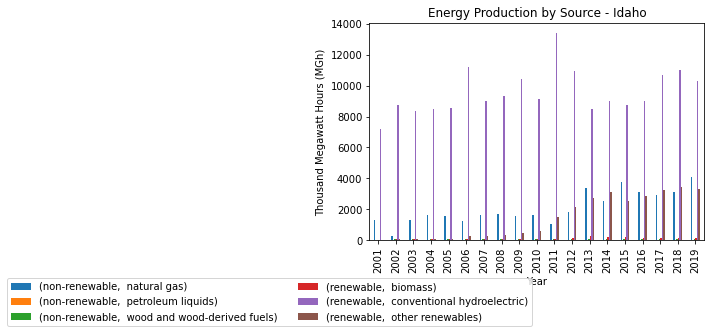

In [38]:
#create a plot showing energy production in the state over time
ID_df.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Energy Production by Source - Idaho")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

In [39]:
#create a dataframe for change in energy production for Idaho
ID_delta=ID_df.diff(axis=0)
ID_delta=ID_delta.drop("2001")
ID_delta

Renewable     non-renewable                                                  \
Energy_Source   natural gas  petroleum liquids  wood and wood-derived fuels   
3                                                                             
2002                -1052.0               -4.0                         35.0   
2003                 1077.0                0.0                         14.0   
2004                  318.0                0.0                         -3.0   
2005                 -105.0                0.0                          4.0   
2006                 -274.0                0.0                        -12.0   
2007                  355.0                0.0                         -1.0   
2008                   46.0                0.0                         -6.0   
2009                  -70.0                0.0                          7.0   
2010                   65.0                0.0                         -7.0   
2011                 -590.0                0.0                          0.0   
2012                  780.0                0.0                          2.0   
2013                 1500.0                0.0                         -3.0   
2014                 -827.0                0.0                         -9.0   
2015                 1212.0                0.0                          0.0   
2016                 -592.0                0.0                          1.0   
2017                 -234.0                0.0                         -6.0   
2018                  239.0                0.0                          5.0   
2019                  945.0                0.0                          0.0   

Renewable     renewable                                                
Energy_Source   biomass  conventional hydroelectric  other renewables  
3                                                                      
2002               35.0                      1546.0              35.0  
2003               14.0                      -415.0              14.0  
2004               -3.0                       108.0              -3.0  
2005                4.0                        80.0               4.0  
2006              -12.0                      2700.0             158.0  
2007               -1.0                     -2220.0               2.0  
2008               -6.0                       341.0             114.0  
2009                7.0                      1071.0             103.0  
2010               17.0                     -1280.0             141.0  
2011                9.0                      4251.0             866.0  
2012               51.0                     -2465.0             646.0  
2013              101.0                     -2467.0             636.0  
2014              -38.0                       529.0             347.0  
2015               -1.0                      -245.0            -540.0  
2016              -59.0                       276.0             275.0  
2017               -8.0                      1637.0             400.0  
2018              -14.0                       354.0             192.0  
2019                2.0                      -691.0             -90.0

In [40]:
#create a summary table for changes in Idaho energy production by source
ID_delta_sum=ID_delta.agg(["mean", "std", "min", "max"])

ID_delta_quant=ID_delta.quantile([.25, .5, .75])
ID_delta_sum=ID_delta_sum.append(ID_delta_quant)
ID_delta_sum

non-renewable                                                  \
       natural gas  petroleum liquids  wood and wood-derived fuels   
mean    155.166667          -0.222222                     1.166667   
std     722.433897           0.942809                    10.450162   
min   -1052.000000          -4.000000                   -12.000000   
max    1500.000000           0.000000                    35.000000   
0.25   -264.000000           0.000000                    -5.250000   
0.5      55.500000           0.000000                     0.000000   
0.75    673.750000           0.000000                     3.500000   

       renewable                                                
         biomass  conventional hydroelectric  other renewables  
mean    5.444444                  172.777778        183.333333  
std    33.872116                 1733.665127        318.938128  
min   -59.000000                -2467.000000       -540.000000  
max   101.000000                 4251.000000        866.000000  
0.25   -7.500000                 -622.000000          6.500000  
0.5     0.500000                  192.000000        127.500000  
0.75   12.750000                  935.500000        329.000000

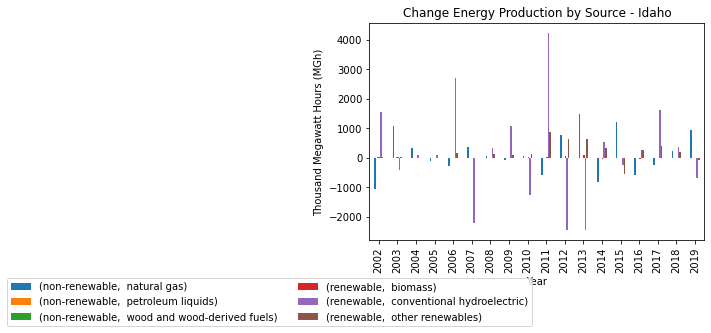

In [41]:
#create a plot showing the change in energy production by source over time for Idaho
ID_delta.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Change Energy Production by Source - Idaho")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

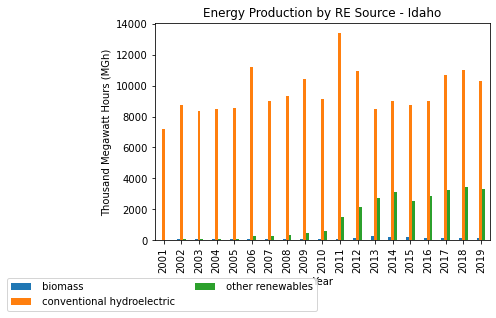

In [42]:
#breakout out Idaho dataframe to include renewable energy sources only and plot energy production over time
RE_ID=ID_df.loc[:, ("renewable")]
RE_ID.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Energy Production by RE Source - Idaho")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

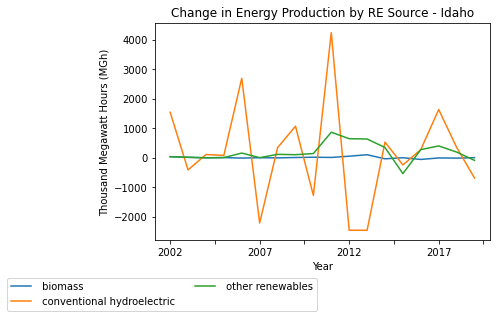

In [43]:
#create a dataframe for change in renewable energy production for Idaho & plot change in energy production over time
RE_ID_delta=RE_ID.diff(axis=0)
RE_ID_delta=RE_ID_delta.drop("2001")
RE_ID_delta.plot(kind="line")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Change in Energy Production by RE Source - Idaho")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)